In [25]:
# from importlib import reload
from tsmom import *
init_notebook_mode(connected=True)


Importing a custom module that is avaialble on https://github.com/rkohli3/TSMOM/blob/master/tsmom.py

# Time Series Momentum Replication
<br>
<br>
## <center> Summary </center>

The following code blocks are based on the Time Series Momentum strategy, TSMOM, as illustrated in the 2011, Moskowitz, Ooi and Pedersen paper. 

1. **What is TSMOM and how is it different from Momentum mentioned by Jegadeesha and Titman, 2001?**<br>
TSMOM is a market anomaly that captures strong positive predicitibility from a security's own past returns. That is, if the past returns are positive, they will continue to be positive and vice versa. <br> <br>
This is related to, however, different from "momentum" in finance literature, which refers to the *cross-sectional* performance comparison of a security with its peers, where securities that have outperfermoed their peers in the past three to twelve months, will continue to do so on an average. TSMOM, focuses primarily on the security's *own* returns

2. **Why replicate?**<br><br>
I do this in order to backtest results for the top 100 most liquid ETF securities in the following asset classes. We perform the analysis on liquid securities to remove significant effects of slippage during execution of the trading strategies and any market impact.<br>
    - Bonds
    - Equity Index
    - Currencies
    - Commodities <br>

    
  
<br>
<br><br><br>
Let's get on with it, shall we?!?!

In [3]:
url = 'https://github.com/quantopian/research_public/tree/master/advanced_sample_analyses/TSMOM/data'
factors = 'factors.csv'
futures = 'futures.csv'
fut_list = 'futures_list.csv'
book = pd.read_csv(futures, parse_dates= True, index_col= [0])
fut_info = pd.read_csv(fut_list)
# fut_info.head()

Get the relevant ``files`` from the local drive. Check the url for data. It provides the data in raw format. You can download and save it on your local drive <br> In this case the *book* is the ``DataFrame`` containing the returns of 54 continous Futures contract


In [4]:
daily_cum = book.apply(lambda x: get_eq_line(x, dtime = 'daily'))
mnth_cum = book.apply(lambda x: get_eq_line(x))
mnth_vol = book.apply(lambda x: get_exante_vol(x))
# daily_cum.plot(logy = True)

Next, we will change the prices to cumulative daily performance so that we can convert it to any the desired return frequency we want 

<br><br>
Plot daily cumulative returns on a log scale with the help of `matplotlib.pyplot` module that I imported as `plt`. The runtime warning is because of NaN(Not a Number), which we get rid of later.

Text(0,0.5,'Cumulative Returns')

/Users/Ravi/anaconda/lib/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning:

invalid value encountered in less_equal



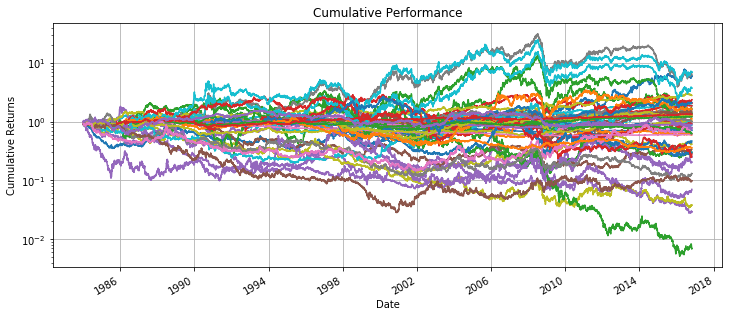

In [5]:
daily_cum.plot(figsize = (12, 5), 
               logy = True,
               legend = False, 
               grid = True, 
               title = 'Cumulative Performance')
plt.ylabel('Cumulative Returns')

In [6]:
futures_exc_rets = get_excess_rets(daily_cum, kind = 'arth', freq = 'm', data_type= 'returns' )

Next, get the excess returns of our universe of continous futures contract. We achieve this by using the function from the module I made. This module calls the daily or monthly risk free rate from Fama-French site and subtract it from the returns generated by each futures contract

$$R_{t,s} = r_{t,s} - {Rf}_{t,s}$$

where, 

$$R_{t,s} \text{ is Excess return at time t of security s}$$
$$r_{t,s}\text{ is return at time t of security s}$$ 
$${Rf}_{t,s}\text{ is risk free rate at time t}$$

In [7]:
tpose = futures_exc_rets.T
tpose.index.name = 'Asset'
tpose.reset_index(inplace = True)
merged = pd.merge(tpose, fut_info, on= 'Asset')
merged.sort_values(by = ['asset_class'.upper(), 'futures'.upper()], inplace = True)
merged.set_index(['asset_class'.upper(), 'futures'.upper()], inplace = True)
del merged['Asset']
straight = merged.T

In my Github page, I have two kinds of files, one containing returns with the column headers as ticker names, the other comprising of asset classes and asset names mapped to their respective tickers. <br><br>

We Transpose our excess return table given by 

```python
tpose = futures_exc_rets.T
tpose.index.name = 'Asset'
tpose.reset_index(inplace = True)

```
<br><br>
and then merge the index with the ticker names from the information file given by

```python
merged = pd.merge(tpose, fut_info, on= 'Asset')
merged.sort_values(by = ['asset_class'.upper(), 'futures'.upper()], inplace = True)
merged.set_index(['asset_class'.upper(), 'futures'.upper()], inplace = True)
```
<br><br><br>
I do this in order to create multi-index columns of **Asset Class** and **Asset Names** being the respective index. <br> <br>

This gives us the below table.

In [8]:
straight.tail()

ASSET_CLASS                   BOND                                            \
FUTURES     AUSTRALIA 10-YEAR BOND AUSTRALIA 3-YEAR BOND CANADA 10-YEAR BOND   
2016-06                   0.003022              0.000964            0.021145   
2016-07                   0.000707              0.000448            0.002582   
2016-08                   0.000128             -0.000077           -0.000170   
2016-09                  -0.001337             -0.001687            0.000661   
2016-10                  -0.004858             -0.003315           -0.016901   

ASSET_CLASS                                                               \
FUTURES     EURO BOBL EURO BUND EURO BUXL EURO SCHATZ JAPAN 10-YEAR BOND   
2016-06      0.009697  0.025279  0.106245    0.002239           0.006280   
2016-07      0.000160  0.003771  0.004159   -0.000766          -0.002444   
2016-08     -0.000981 -0.002925 -0.021003   -0.000470          -0.008157   
2016-09      0.003429  0.005884  0.003915    0.000970           0.003992   
2016-10     -0.008093 -0.022215 -0.066549   -0.001754          -0.004958   

ASSET_CLASS                                ...       CURRENCIES            \
FUTURES     LONG GILT US 10-YEAR NOTE      ...      SWITZERLAND        UK   
2016-06      0.046470        0.025004      ...         0.014793 -0.085343   
2016-07      0.018705        0.000116      ...         0.008364 -0.000432   
2016-08      0.012632       -0.009134      ...        -0.017096 -0.009195   
2016-09     -0.010100        0.001190      ...         0.010972 -0.012370   
2016-10     -0.040059       -0.012406      ...        -0.019210 -0.061607   

ASSET_CLASS    EQUITY INDEXES                                               \
FUTURES     AEX (NETHERLANDS) DAX (GERMANY) FTSE 100 (UK) FTSE/MIB (ITALY)   
2016-06             -0.026203     -0.057401      0.041490        -0.095907   
2016-07              0.033669      0.067629      0.039190         0.038460   
2016-08              0.018339      0.027166      0.016013         0.006634   
2016-09             -0.004660     -0.008576      0.016457        -0.027371   
2016-10              0.008067      0.016224      0.015739         0.055252   

ASSET_CLASS                                                                 
FUTURES     IBEX 35 (SPAIN) S&P 500 (US) SPI 200 (AUSTRALIA) TOPIX (JAPAN)  
2016-06           -0.091758     0.001317           -0.029615     -0.096491  
2016-07            0.056864     0.036954            0.065904      0.066252  
2016-08            0.018337     0.000197           -0.020128      0.001148  
2016-09            0.007522    -0.001170            0.003522      0.004578  
2016-10            0.049717    -0.017380           -0.030463      0.052160  

[5 rows x 54 columns]

In [9]:
bonds = (straight.BOND)
comm = (straight.COMMODITIES)
currncs = (straight.CURRENCIES)
eq_idx = (straight['EQUITY INDEXES'])
df_ts_df = get_ts(bonds)

<br><br>
Store values of our different asset classes and then call our function `get_ts` to get the t-statistics on the lagged return of the security itself. <br><br><br>**Why do I get regress the returns against its lagged ownself?** <br>

I perform the above to understand whether the time series is stationary, i.e. its mean, standard deviation are constant over time. In other words, whether the series is independent of time and whether or not we can use previous values to predict future values. One example of non-stationary series would be AAPL Iphone sales that are seasonal and peak during Q2, Q3 of every year, thus dependent on time. This concept of regressing a time series against its lagged ownself is called **Autoregression**. <br><br>

**Autoregression**, simply put, is a concept that is based on the premise that past values of a time series can be used to predict future values. So an AR(1) model would mean that current value is based on the immediate preceding value and AR(2) model would mean that current value is based on the previous 2 values. Thus leading to ourAutoregression Model defined as `AR(p)`where p is the number of periods you lag the returns by
<br><br>

$$
X_{t} = c + \sum_{i=1}^{p}{\beta_{i}X_{t-i}} + \epsilon
$$

where, <br><br>$\beta$:  is our lagged parameter (slope) for which we will have a t-stat. <br>
$\epsilon$:  is white noise<br>
$X_{t-i}$:  is value at $t-1$<br>
$X{t}$:  is value at $t$<br><br><br>


*For example*, $AR(2)$ model would mean

$$X_{t} = c + {\beta}_{1}{X_{t-1}} + \beta_{2}{X_{t-2}} + \epsilon$$

and for 

$\beta_{1}$ and $\beta_{2}$, each, we will have a **t-stat** at 95% confidence interval

<br><br><br>
### Plotting our t-stats!
Plot our t-stats for lagged returns and see if we have proof of stationarity (time dependencies) <br>
**Stats 101**:  if t > 1.96 (2), then we reject the $\text{H}_{0}:  \beta = 0$

<br><br><br>
You can change the input in the `get_ts(input)` to comm, currncs or eq_idx for Commodities, Currencies or Equity index respectively
<br>

```python
df_ts_df = get_ts(eq_idx)
```

Text(0.5,0.98,'Lagged t-stats for Bonds')

Text(0.01,0.5,'t-stats')

Text(0.5,0.05,'Number of Lags')

Text(0.5,1,'AUSTRALIA 10-YEAR BOND')

<Container object of 48 artists>

Text(0.5,1,'AUSTRALIA 3-YEAR BOND')

<Container object of 48 artists>

Text(0.5,1,'CANADA 10-YEAR BOND')

<Container object of 48 artists>

Text(0.5,1,'EURO BOBL')

<Container object of 48 artists>

Text(0.5,1,'EURO BUND')

<Container object of 48 artists>

Text(0.5,1,'EURO BUXL')

<Container object of 48 artists>

Text(0.5,1,'EURO SCHATZ')

<Container object of 48 artists>

Text(0.5,1,'JAPAN 10-YEAR BOND')

<Container object of 48 artists>

Text(0.5,1,'LONG GILT')

<Container object of 48 artists>

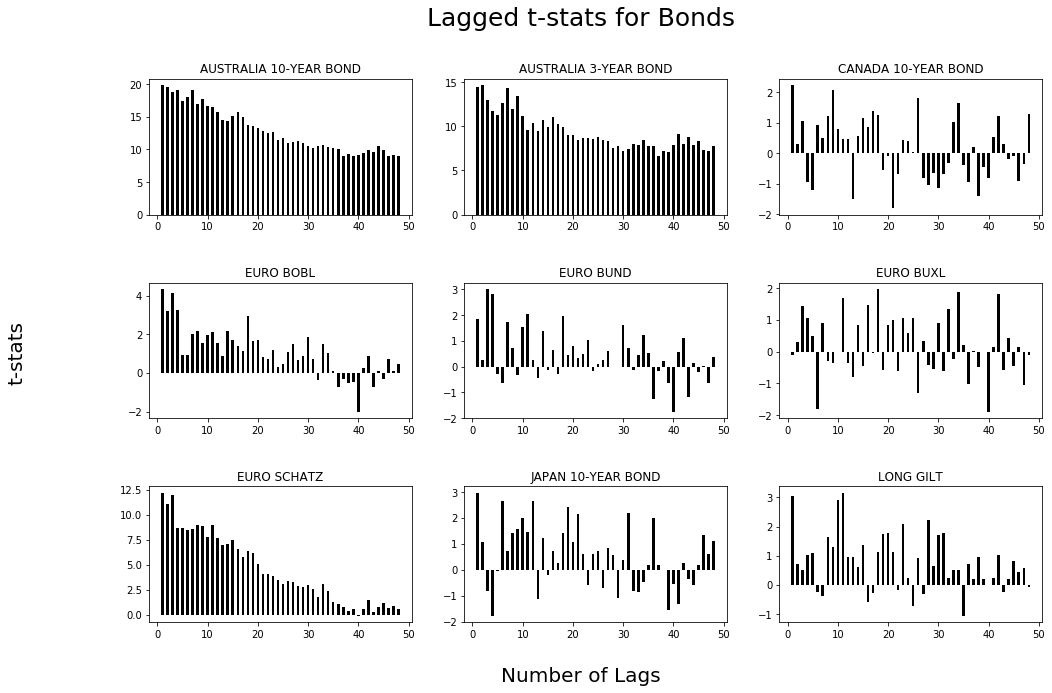

In [10]:
fig_lag, axs = plt.subplots(3, 3, 
                            figsize = (16, 10), 
                            facecolor = 'white', 
                            edgecolor = 'k', 
                            )

plt.suptitle('Lagged t-stats for Bonds', size = 25)
axs = axs.ravel()
fig_lag.subplots_adjust(hspace = 0.5)
fig_lag.text(0.01, 0.5, 
             't-stats', 
             rotation = 90, 
             va = 'center', 
             ha = 'center',
             fontdict = {'fontsize':20}
            )

fig_lag.text(0.5, 0.05, 
             'Number of Lags', 
             rotation = 0, 
             va = 'center', 
             ha = 'center',
             fontdict = {'fontsize':20}
            )
for i in range(len(df_ts_df.columns[:9])):
    _ax = axs[i]
    ser = df_ts_df.iloc[:, i]
    _ax.set_title('{}'.format(ser.name), fontdict={'fontsize': 12})
    _ax.bar(ser.index, ser.values, width = 0.5, color = 'black')

The high *t-stats* indicate a strong positive predictibility of the security's past returns, showing robust proof that we can rejuct our null hypothesis (our past returns cannot predict future returns). <br><br>
There is a high degree of dependence on time within the bonds asset class and a reversal trend after 24-30 months, just as the paper mentions

<br><br><br>Create summary statistics for each of the Futures contract to see how they have performed over the years. These statistics are: 
- Kurtosis
- Annualized Average 
- Annualized Volatility
- Sharpe Ratio
- Skewness
- Data Available from (Start Dates)
- Asset Class
- Futures Contract

In [11]:
kurt = book.kurt()
kurt.name = 'Kurtosis'
ann_av, ann_vol, sr_ = get_stats(book, dtime= 'daily')
ann_av.name = 'Ann Mean'
ann_vol.name = 'Ann Volatility'
sr_.name = 'Sharpe Ratio'
frst_dates = daily_cum.apply(lambda x: x.first_valid_index().strftime('%Y-%m-%d'))
frst_dates.name = 'Start'
sk = book.skew()
sk.name = 'Skewness'
sumstats = pd.concat([frst_dates, ann_av, ann_vol, sk, kurt, sr_], axis = 1)
sumstats.index.name = 'Asset'
sumstats.reset_index(inplace= True)
summerged = sumstats.merge(fut_info)

summerged.sort_values(by=["ASSET_CLASS", "FUTURES"], inplace=True)
summerged.set_index(['asset_class'.upper(), 'futures'.upper()], inplace = True)
del summerged['Asset']
summerged.iloc[:, 1:] = summerged.iloc[:, 1:].applymap(lambda x: np.round(x, 3)) 

summerged.style.set_properties(**{'background-color' : 'black', 
                             'color': 'white', 
                             'text-align': 'center', 
                             'font-size': '9pt'})\
         .set_caption('Summary Statistics for Futures Contracts')

In [12]:
'Maximum Sharpe ratio is {0:,.2} of {1}'.format(summerged.iloc[:,-1].max(), 
                                                summerged.iloc[:,-1].idxmax(axis = 0)[1])

'Maximum Sharpe ratio is 0.47 of EURO BUND'

On a risk adjusted basis, **Euro Bund** has seemed to perform the best!

In [13]:
unlevered = get_tsmom(mnth_vol, mnth_cum)
levered = get_tsmom(mnth_vol, mnth_cum, flag = True, scale = 0.20)

I then call TSMOM pnl function from the custom module `tsmom`, that takes the `monthly ex-ante volatility` and `monthly cumulative arithmatic returns` as required inputs. <br><br><br><br>

Recall the regression on the security's past 12 months excess returns.

$$r_{t}^s = c + (sign)\beta_{h}r_{t-h}^s + \epsilon$$
<br>
Here (sign) is either positive or negative. This is our signal indicators on the past 12 month returns. If the sign is positive/negative, you buy/sell(short) and hold the position for 1 month. 
<br><br>

Thus<br>
$$r_{t,t+1}^{TSMOM, s} = (sign)r_{(t-12, t)}^{s}r_{(t, t+1)}^s$$
<br><br>

For example, let's say the returns for Februrary, 2018 for SPY are $-3.52\%$ and the past 12 month returns are $-10\%$. Since our *sign* is negative, we will sell short SPY and our returns for february will be $(sign)-3.52\%$ or 
$3.52\%$ <br><br><br><br><br>

To further reduce our volatility, we can also scale our positions by scaling the ex-ante volatility. This makes sense intuitively for the reasons mentioned in the paper and also for the fact that during high volatility periods, we well decrease our position size because the ex-ante volatility has risen. We use the scle as 20%, else, we find our leverage to increase significantly during low volatility bull market periods.
<br><br>
The *scaling factor thus is:* $\frac{20\%}{\sigma_{t-1}}$. So our complete equation then becomes: 

$$r_{t,t+1}^{TSMOM, s} = (sign)r_{(t-12, t)}^{s}\frac{20\%}{\sigma_{t-1}}r_{(t, t+1)}^s$$


In [14]:
unlevered.loc[:, 'Cumulative'] = (1 + unlevered.loc[:, 'TSMOM']).cumprod()
levered.loc[:, 'Cumulative VolScale'] = (1 + levered.loc[:, 'TSMOM VolScale']).cumprod()

strat = unlevered.iloc[:, 0]
strat_vol = levered.iloc[:,0]

def get_backtest_res(series, freq = 'monthly'):
    port_mean, port_std, port_sr = get_stats(series, freq)
    nmonths = series.shape[0]
    if freq == 'daily':
        nmonths = series.resample('BM').last().shape[0]
    
    print('Back test period for {0} is from {1} to {2} \
with a total of {3} months \n\n'.format(series.name, 
                                        series.index[0].date().strftime('%b-%Y'), 
                                        series.index[-1].date().strftime('%b-%Y'), 
                                        nmonths))
    print(('Annualized returns for {0} \
is: {1:,.2%}\nAnnualized volatility for {0} is: {2:,.2%}\n\
Sharpe Ratio for {0} is {3:,.3f}\n\n').format(series.name, 
                                              port_mean, 
                                              port_std, 
                                              port_sr, 
                                               ))
    
get_backtest_res(strat)
get_backtest_res(strat_vol)



Back test period for TSMOM is from Feb-1985 to Oct-2016 with a total of 381 months 


Annualized returns for TSMOM is: 7.08%
Annualized volatility for TSMOM is: 6.30%
Sharpe Ratio for TSMOM is 1.125


Back test period for TSMOM VolScale is from Feb-1985 to Oct-2016 with a total of 381 months 


Annualized returns for TSMOM VolScale is: 9.28%
Annualized volatility for TSMOM VolScale is: 6.28%
Sharpe Ratio for TSMOM VolScale is 1.478




The backtest results are shown above. TSMOM and TSMOM Volatility Scaled have both outperformed market in the period! More comprehensive analysis and charts are provided below

In [15]:
spy_prices = pd.read_csv('spy_1985.csv', 
                         index_col = [0], 
                         parse_dates= True, 
                         dtype= {'Adj Close**': np.float64}, 
                         thousands = ',')
spy_prices = spy_prices.loc[:, 'Adj Close**']
spy_prices.name = 'SPY'

spy_mnth_cum = get_eq_line(spy_prices, data = 'prices', dtime = 'monthly')
spy_mnth_cum = spy_mnth_cum.reindex(unlevered.index)
# spy_mnth_cum.iloc[0] = 1
spy_rets = get_rets(spy_prices).dropna()
spy_rets = spy_rets.reindex(unlevered.index)
spy_rets_d = get_rets(spy_prices, freq= 'd')

spy_mean, spy_std, spy_sr = get_stats(spy_rets_d, dtime= 'daily')

print('Back test period for {0} is from {1} to {2} \
with a total of {3} days and {4} months \n\n'.format(spy_rets_d.name, 
                                                     spy_rets.index[0].date().strftime('%b-%Y'), 
                                                     spy_rets.index[-1].date().strftime('%b-%Y'), 
                                                     np.busday_count(spy_rets.index[0], spy_rets.index[-1]),
                                                     spy_rets.shape[0], 
                                                     ))
print(('Annualized Mean for {3} \
is: {0:,.2%}\nAnnualized volatility for {3} is: {1:,.2%}\n\
Sharpe Ratio for {3} is {2:,.3f}').format(spy_mean, 
                                          spy_std, 
                                          spy_sr, 
                                          spy_rets.name))


Back test period for SPY is from Feb-1985 to Oct-2016 with a total of 8262 days and 381 months 


Annualized Mean for SPY is: 10.08%
Annualized volatility for SPY is: 17.82%
Sharpe Ratio for SPY is 0.565


For an Index, SPY has had a tremendous run with greater than 10% annualized returns since 1985 and a decent sharpe ratio. <br><br>
Another interesting thing to notice is the negative beta of the strategies. A low sensitivity to market movements can also allow us to futher lever our positions

In [16]:
pd.concat([get_perf_att(strat, spy_rets), 
           get_perf_att(strat_vol, spy_rets), 
           get_perf_att(spy_rets_d, spy_rets_d, freq='daily')], axis = 1)

,TSMOM,TSMOM VolScale,SPY
Alpha,0.076,0.096,-0
Annualized_Mean,0.07,0.09,0.10
Annualized_Volatility,0.063,0.063,0.178
Beta,-0.062,-0.041,1
Calmar Ratio,0.525,1.268,0.156
Max Drawdown,13.55%,7.47%,56.78%
Sharpe Ratio,1.125,1.478,0.565
Sortino Ratio,1.088,1.764,-3.603


In [17]:
unlevered.loc[:, 'SPY'] = spy_mnth_cum
levered.loc[:, 'SPY'] = spy_mnth_cum
unlevered.iloc[0, -2:] = 1
levered.iloc[0, -2:] = 1

Let's see what our interactive plots show next. Hover your cursor over the chart to active interactivity.

In [18]:
ts_idx = levered.index
init_cap = 100000
trace_10 = Scatter(x = ts_idx,
                   y = unlevered.Cumulative * init_cap,
                   visible = False, 
                   name = 'Unlevered TSMOM',
                   yaxis = 'y2',
                   line = dict(dash = 'line',
                               color = 'black', 
                               width = 3)
                 )
trace_20 = Scatter(x = ts_idx,
                   y = unlevered.Leverage,
                   visible = False,
                   name = 'Leverage',
                   line = dict(dash = 'dot',
                               color = '#aaa9a9', 
                               width = 1.5, 
                               )
                 )
                  
trace_30 =  Scatter(x = ts_idx,
                    y = unlevered.SPY * init_cap,
                    visible = False,
                    name = 'SPY',
                    yaxis = 'y2',
                    line = dict(dash = 'line', 
                                color = 'blue', 
                                width = 3)    
                   )

trace_11 = Scatter(x = ts_idx,
                   y = (levered['Cumulative VolScale'] * init_cap),
                   visible = True,
                   name = 'Levered TSMOM',
                   yaxis = 'y2',
                   line = dict(dash = 'line',
                               color = 'black', 
                               width = 3)
                 )
trace_12 = Scatter(x = ts_idx,
                   y = (levered.Leverage),
                   visible = True,
                   name = 'Leverage',
                   line = dict(dash = 'dot',
                               color = '#aaa9a9', 
                               width = 1.5),
                 )
trace_13 = Scatter(x = ts_idx,
                   y = (levered.SPY) * init_cap,
                   visible = True,
                   name = 'SPY',
                   yaxis = 'y2',
                   line = dict(dash = 'line',
                               color = 'blue', 
                               width = 3,
                              )
                  )
data_ttl = [trace_10, trace_20, trace_30, trace_11, trace_12, trace_13]
updatemenus = list([dict(#type="buttons", 
                         active= 1, 
                         
                         buttons=list([dict(label = 'Unlevered',  
                                            method = 'update', 
                                            args = [{'visible': [True, True, True, False, False, False]},]),
                       
                                       dict(label = 'Levered', 
                                            method = 'update', 
                                            args = [{'visible': [False, False, False, True, True, True]},]), 
                                       
                                      ]),  
                         x = 0.15,
                         y = 1.2
                        ),
                   ], 
                   
                  )

lay = Layout(title = 'TSMOM scaled for volatility',
             legend = dict(x = 0.75, y = 1.22),

             xaxis = dict(title = 'Dates', 
                          showgrid = True, 
                          showticklabels = True,
                          linecolor = 'black',
                          tickformat = '%b %Y',
                          hoverformat = '%b %Y'
                         ),
              yaxis = dict(title = 'Leverage', 
                          showgrid = False,
                          showticklabels = True,
                          linecolor = 'black',
                          range = [0, 6],   
                          ),
             yaxis2 = dict(title = 'Cumulative Returns', 
                          showgrid = False,
                          showticklabels = True,
                          linecolor = 'black',
                          range = [4.8922, 6.65863],
                          nticks = 5,
                          type = 'log',
                           side = 'right',
                           overlaying = 'y'
                          ),
             
             paper_bgcolor = 'white',
             plot_bgcolor = 'white',
             autosize = False,
             height = 500,
             width = 750,
             showlegend = True,
             updatemenus = updatemenus,

             shapes = [
                 {
                     'type' : 'line',
                     'xref' : 'paper',
                     'x0' : 0,
                     'y0' : init_cap,
                     'x1' : 1,
                     'y1' : init_cap,
                     'line' : {
                         
                         'color': 'black',
                         'width': 1,
                         'dash': 'dash'
                             },
                 },
                     {
                      'x0':'2000-03-15', 
                      'x1':'2000-09-15', 
                      'yref': 'paper',
                      'y0':0,
                      'y1':1,
                      'fillcolor':'rgba(30,30,30,0.3)',  
                      'opacity':.2, 
                      'line' : {'width': 0
                               },
                      },
                     {
                      
                      'x0':'2007-08-01', 
                      'x1':'2009-06-01', 
                      'yref': 'paper',
                      'y0':0,
                      'y1':1,
                      'fillcolor':'rgba(30,30,30,0.3)',  
                      'opacity':.2, 
                      'line' : {'width': 0
                               },
                      },
             ]
            )
annot = []

annot.extend([dict(xref = 'paper',
                  yref = 'paper',
                  x= 0.82, 
                  y= 0.98,
                  xanchor ='right', 
                  yanchor='right',
                  text= 'Global Financial Crisis',
                  font=dict(family='<b>Arial<b>',
                            size= 12, 
                            color= 'black',
                           ),
                  showarrow=False), 
            dict(xref = 'paper',
                  yref = 'paper',
                  x= 0.515, 
                  y= 0.98,
                  xanchor ='right', 
                  yanchor='right',
                  text= 'Dotcom',
                  font=dict(family='<b>Arial<b>',
                            size= 12, 
                            color= 'black',
                           ),
                  showarrow=False)
             ]
            )

lay['annotations'] = annot
fig_ttl = Figure(data = data_ttl, layout = lay)
iplot(fig_ttl, show_link = False)

In [19]:
get_monthly_heatmap(strat, 'RdYlGn', yr_from='2000')
get_monthly_heatmap(strat_vol, 'RdYlGn', yr_from = '2000')

get_monthly_hist(strat)
get_monthly_hist(strat_vol)

underwater(spy_rets)
underwater(strat, range = [-20, 0])
underwater(strat_vol, range = [-20, 0])


The drawdowns for the strategies are very low compared to SPY.

In [20]:
periods = pf.interesting_periods.PERIODS
p_df = pd.DataFrame(periods)
p_df.index = ['From', 'To']
p_df = p_df.transpose()
p_df = p_df.applymap(lambda x: x.to_period(freq = 'd'))
p_df

,From,To
Dotcom,2000-03-10,2000-09-10
Lehmann,2008-08-01,2008-10-01
9/11,2001-09-11,2001-10-11
US downgrade/European Debt Crisis,2011-08-05,2011-09-05
Fukushima,2011-03-16,2011-04-16
US Housing,2003-01-08,2003-02-08
EZB IR Event,2012-09-10,2012-10-10
Aug07,2007-08-01,2007-09-01
Mar08,2008-03-01,2008-04-01
Sept08,2008-09-01,2008-10-01


In [27]:
def css():
    style = open('css/custom.css', 'r').read()
    return HTML(style)
css()